# 08. 다층 퍼셉트론으로 MNIST 분류하기

앞서 소프트맥스 회귀로 MNIST 데이터를 분류하는 실습을 해봤습니다. 소프트맥스 회귀 또한 인공 신경망이라고 볼 수 있는데, 입력층과 출력층만 존재하므로 소프트맥스 함수를 활성화 함수로 사용한 '단층 퍼셉트론'이라고 할 수 있습니다. 이번 챕터에서는 은닉층을 추가로 넣어 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 MNIST 데이터를 분류해봅시다.



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed(777)

In [7]:
batch_size = 100
learning_rate = 0.01
training_epochs = 15

In [23]:
# 데이터셋
mnist_train = dsets.MNIST(root='../dataset/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)
mnist_test = dsets.MNIST(root='../dataset/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [24]:
# 데이터 로더
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

In [34]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(784, 64) # input_layer, output_layer
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(32, 10)     
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        out = self.layer2(out)
        out = self.relu2(out)
        out = self.layer3(out)
        return out

In [35]:
model = MLP().to(device)

In [36]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [37]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [38]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [39]:
losses = []

In [42]:
for epoch in range(training_epochs):
    avg_cost = 0
    
    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        hypothesis = model(X)
        
        optimizer.zero_grad()
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
    
    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
    losses.append(avg_cost)
    

[Epoch:    1] cost = 0.136838287
[Epoch:    2] cost = 0.116302498
[Epoch:    3] cost = 0.0999012068
[Epoch:    4] cost = 0.0901811793
[Epoch:    5] cost = 0.082729578
[Epoch:    6] cost = 0.0821720511
[Epoch:    7] cost = 0.0778103247
[Epoch:    8] cost = 0.077177085
[Epoch:    9] cost = 0.0669058934
[Epoch:   10] cost = 0.0659914166
[Epoch:   11] cost = 0.0579464324
[Epoch:   12] cost = 0.0623005107
[Epoch:   13] cost = 0.0590611696
[Epoch:   14] cost = 0.0558883287
[Epoch:   15] cost = 0.0629827827


Accuracy: 0.9623000025749207
Label:  tensor([9])
Prediction:  9


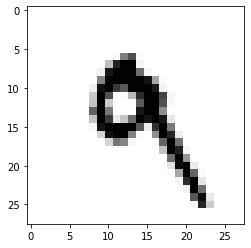

In [50]:
import random
import matplotlib.pyplot as plt

# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    
    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label: ', Y_single_data)
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()


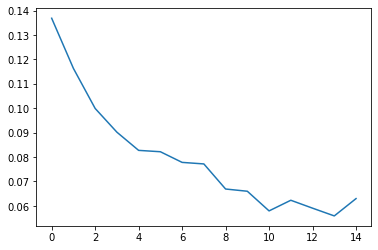

In [55]:
plt.plot(losses)
plt.show()